In [40]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Load Dataset

In [41]:
df = pd.read_csv('winequality-red.csv')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [42]:
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


<AxesSubplot:ylabel='Count'>

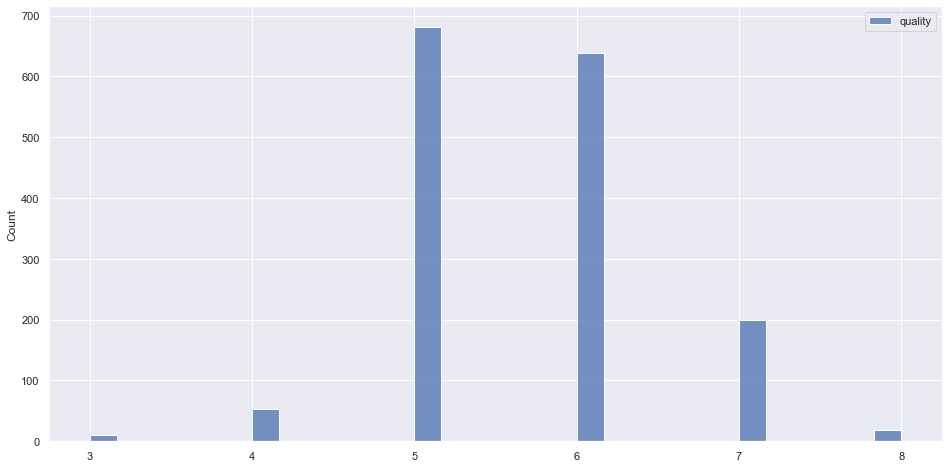

In [43]:
quality = pd.DataFrame(df['quality'])

f = plt.figure(figsize=(16, 8))
sb.histplot(data = quality)

# Correlation - to check variables affecting the quality of wine

<AxesSubplot:>

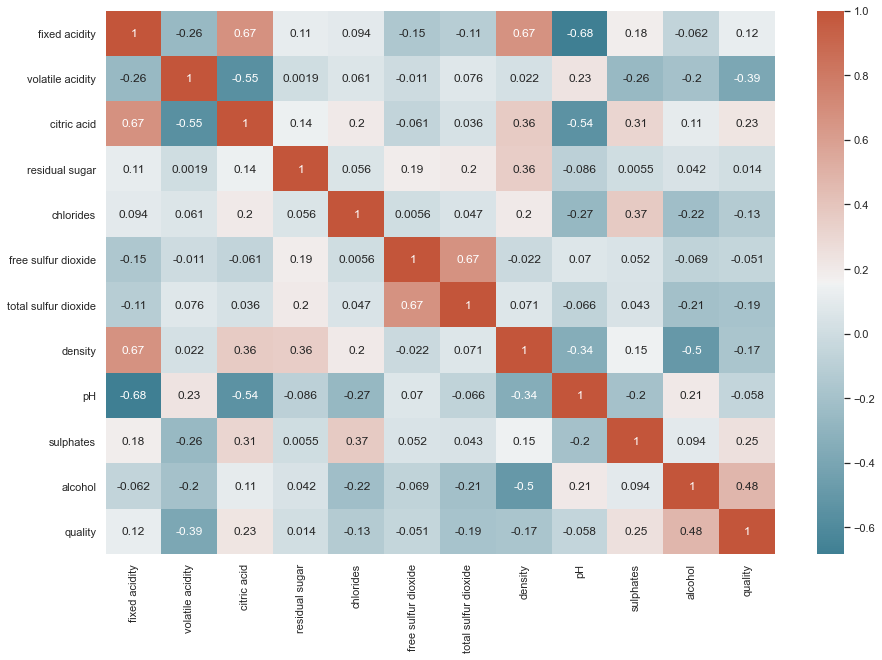

In [44]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sb.diverging_palette(220, 20, as_cmap=True))

# Plot boxplot to check quality against every other variable

In [45]:
others = pd.DataFrame(df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])

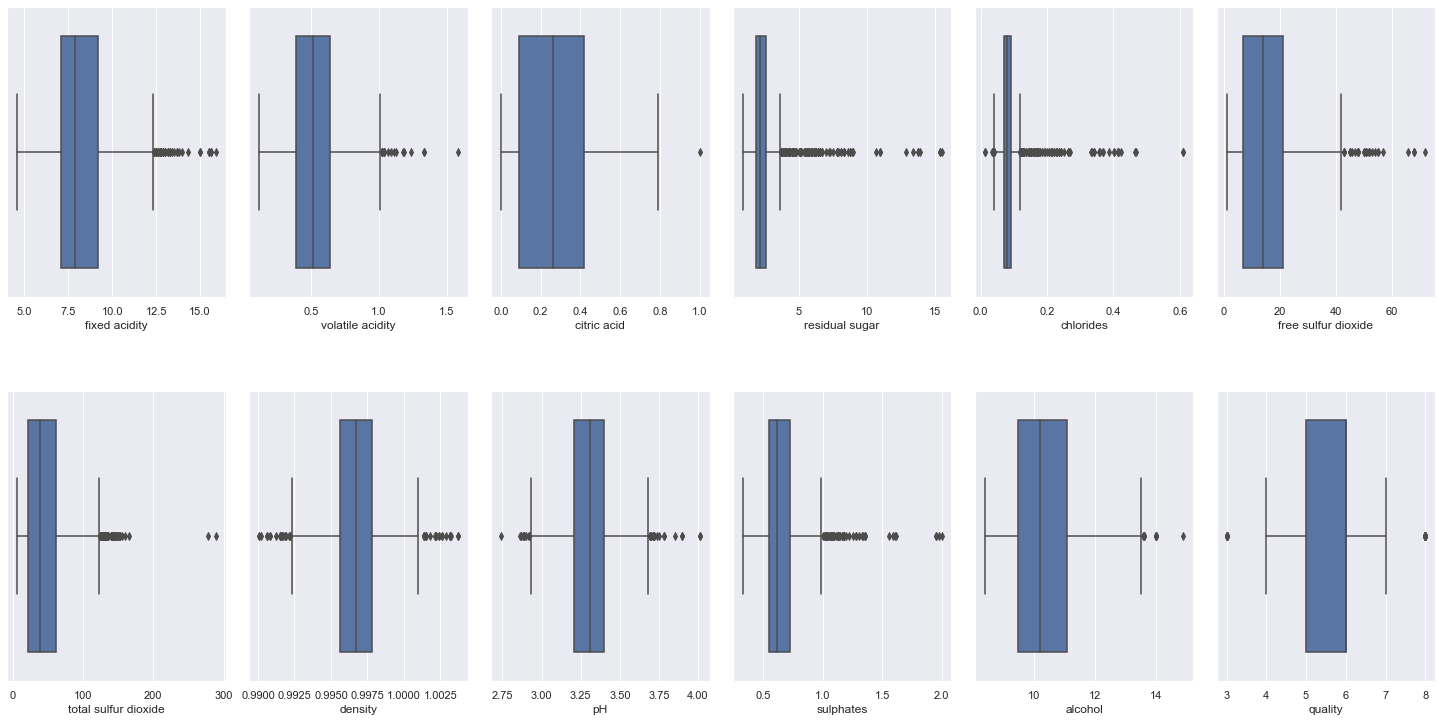

In [46]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sb.boxplot(x=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

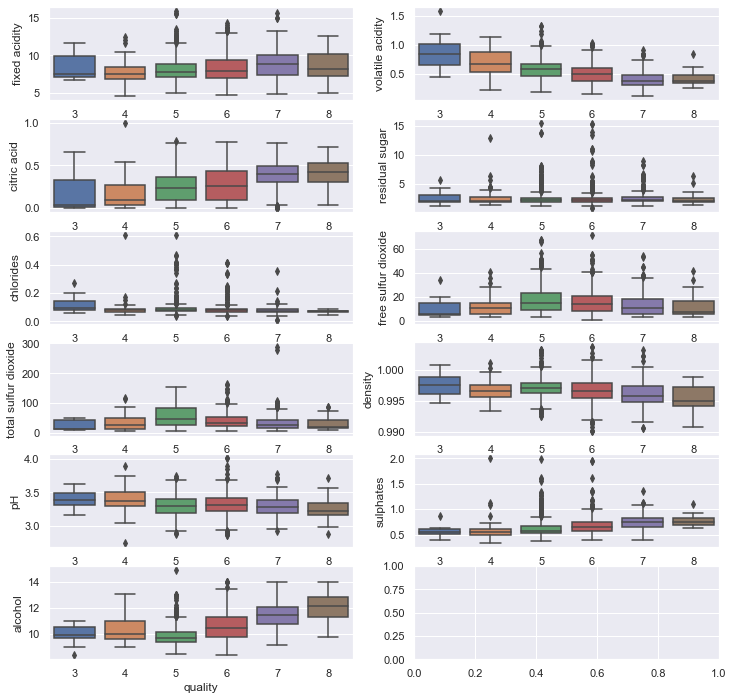

In [47]:
f, axes = plt.subplots(6, 2, figsize=(12, 12))

sb.boxplot(x = 'quality', y = 'fixed acidity', data = df, ax = axes[0,0])
sb.boxplot(x = 'quality', y = 'volatile acidity', data = df, ax = axes[0,1])
sb.boxplot(x = 'quality', y = 'citric acid', data = df, ax = axes[1,0])
sb.boxplot(x = 'quality', y = 'residual sugar', data = df, ax = axes[1,1])
sb.boxplot(x = 'quality', y = 'chlorides', data = df, ax = axes[2,0])
sb.boxplot(x = 'quality', y = 'free sulfur dioxide', data = df, ax = axes[2,1])
sb.boxplot(x = 'quality', y = 'total sulfur dioxide', data = df, ax = axes[3,0])
sb.boxplot(x = 'quality', y = 'density', data = df, ax = axes[3,1])
sb.boxplot(x = 'quality', y = 'pH', data = df, ax = axes[4,0])
sb.boxplot(x = 'quality', y = 'sulphates', data = df, ax = axes[4,1])
sb.boxplot(x = 'quality', y = 'alcohol', data = df, ax = axes[5,0])

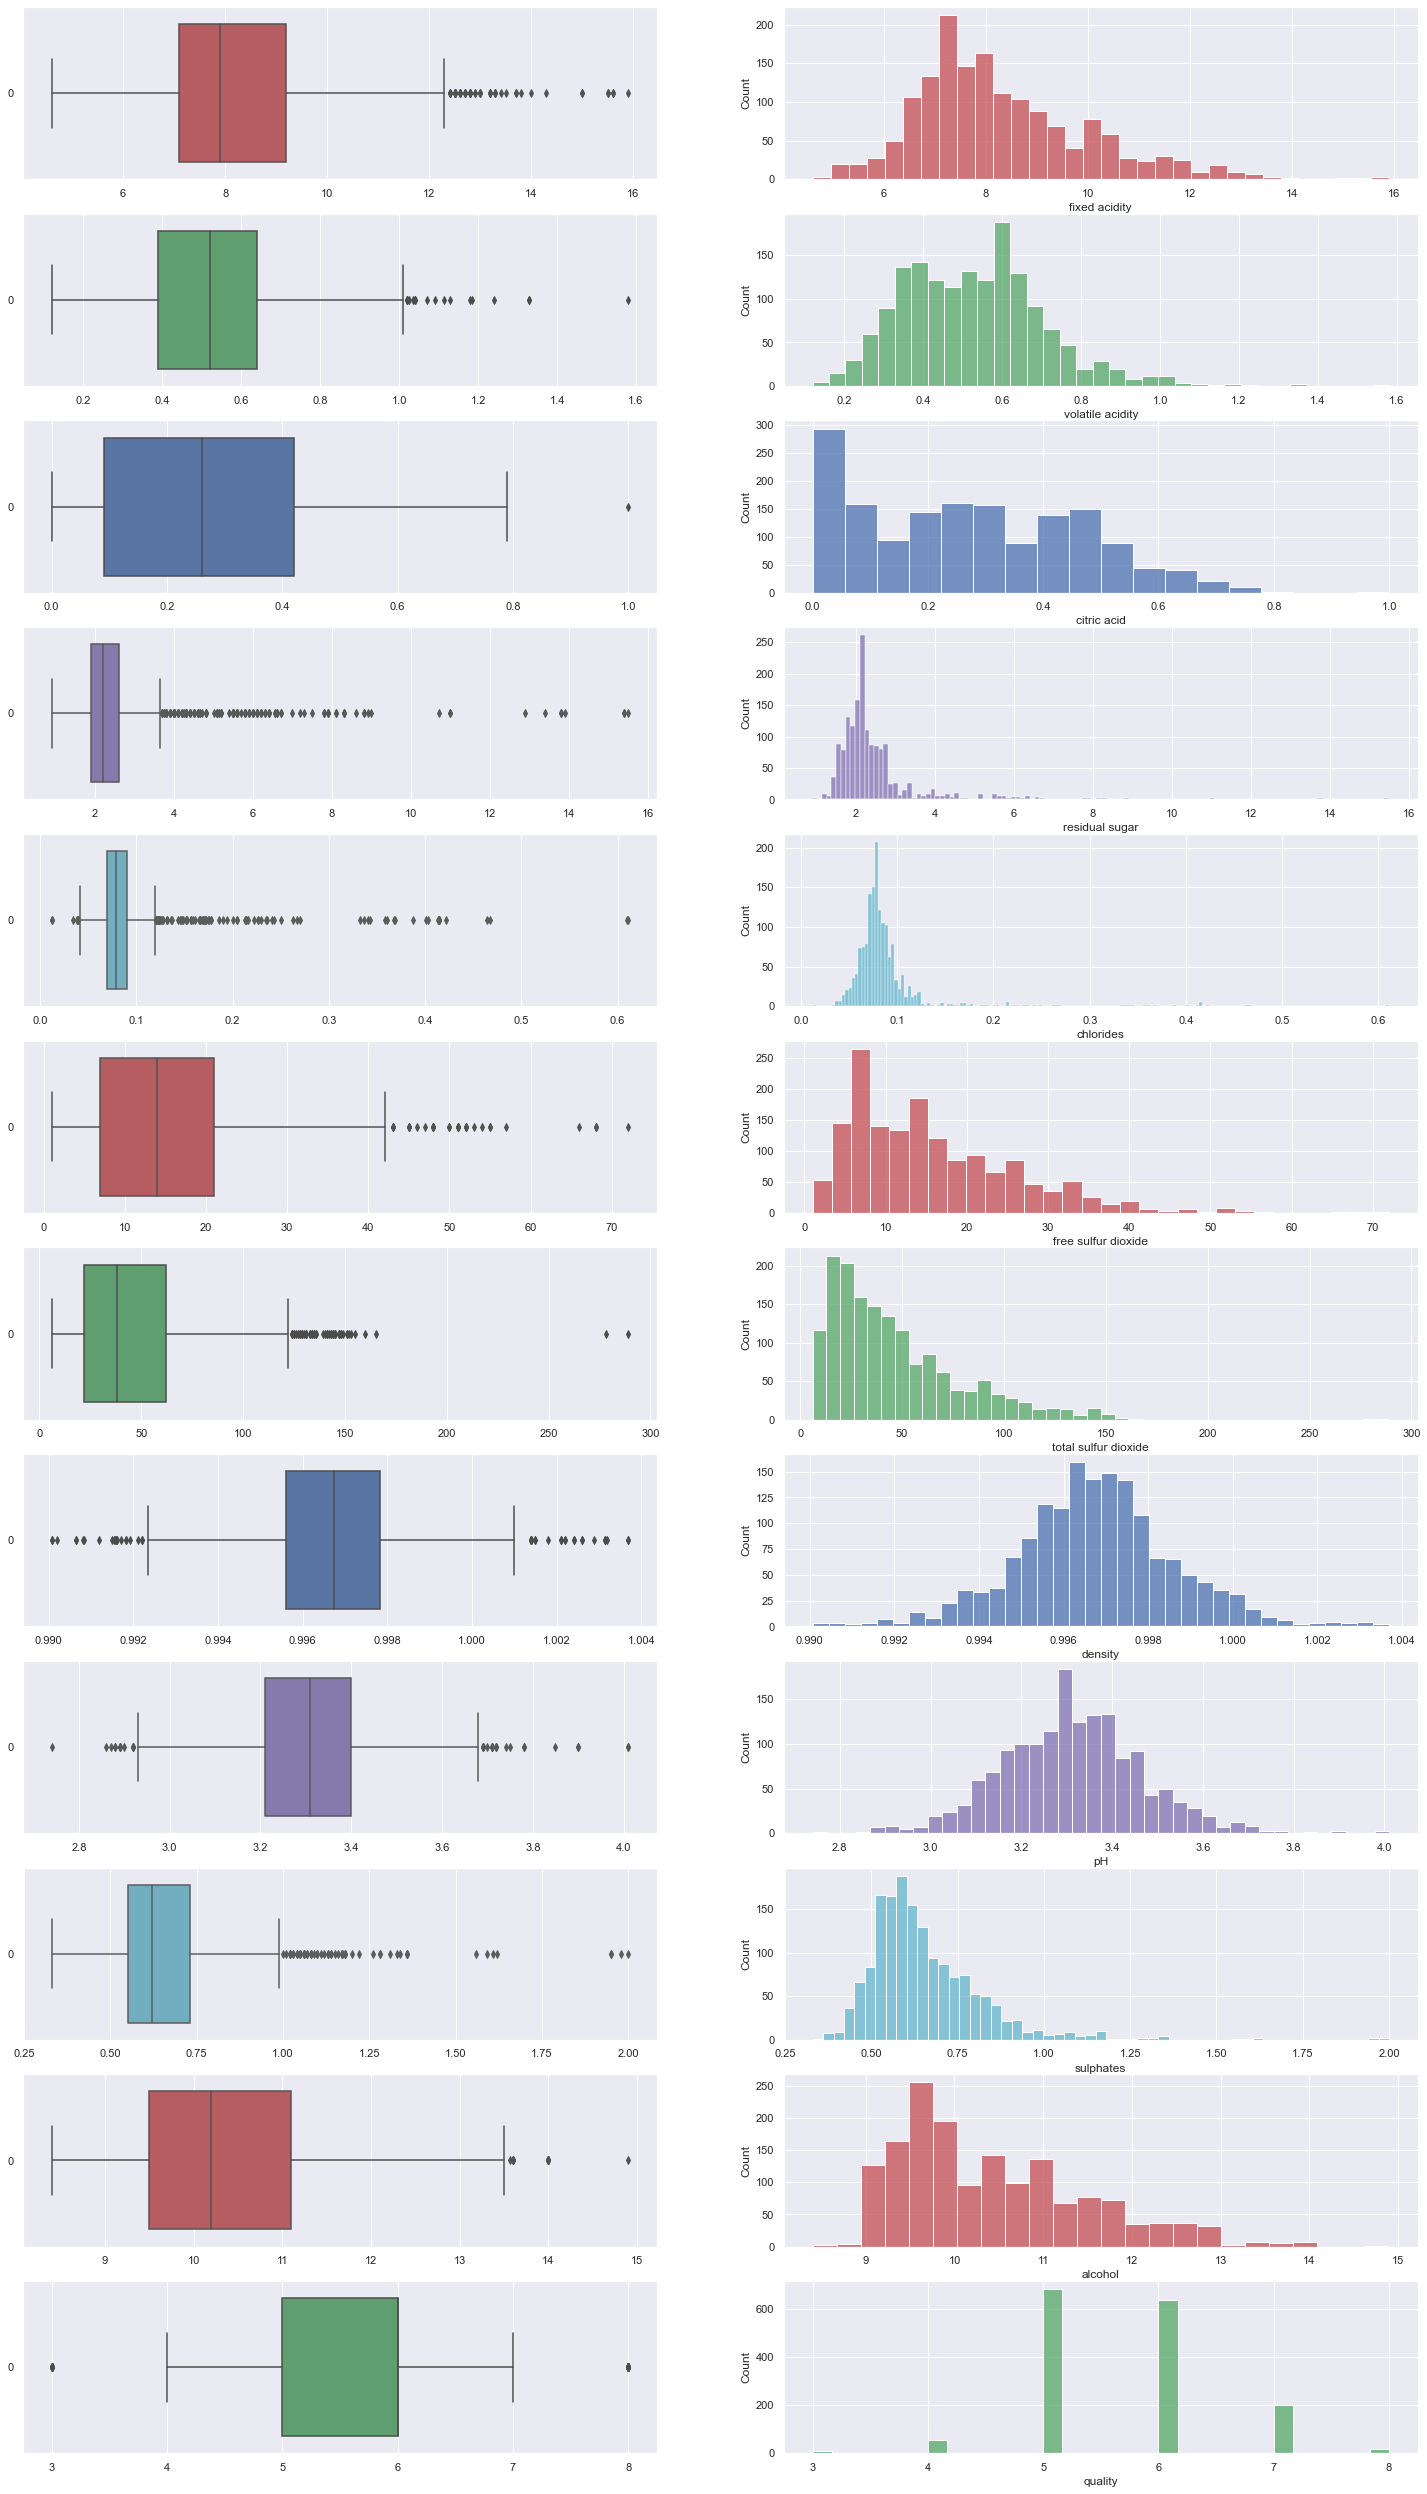

In [48]:
f, axes = plt.subplots(12, 2, figsize=(25, 45))
colors = ["r", "g", "b", "m", "c", "r", "g", "b", "m", "c","r", "g"]

count = 0
for var in df:
    sb.boxplot(data=df[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.histplot(data=df[var], color = colors[count], ax = axes[count,1])
    count += 1

# Linear Regression

In [50]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [89]:
def printAllRegression(x,y = quality):
    #x_train = x[:1199]
    #y_train = y[:1199]

    #x_test = x[-400:]
    #y_test = y[-400:]
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
    
    linreg = LinearRegression()
    linreg.fit(x_train,y_train)
    
    # Coefficients of the Linear Regression line
    print('Intercept \t: b = ', linreg.intercept_)
    print('Coefficients \t: a = ', linreg.coef_)
    
        # Formula for the Regression line
    regline_x = x_train
    regline_y = linreg.intercept_ + linreg.coef_ * x_train

    # Plot the Linear Regression line
    f, axes = plt.subplots(1, 1, figsize=(16, 8))
    plt.title('Linear Regression on Train data')
    plt.scatter(x_train, y_train)
    plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
    plt.show()

    # Predict Total values corresponding to HP Test
    total_test_pred = linreg.predict(x_test)

    # Plot the Predictions
    f, axes = plt.subplots(1, 1, figsize=(16, 8))
    plt.title('Linear Regression on Test data')
    plt.scatter(x_test, y_test, color = "green")
    plt.scatter(x_test, total_test_pred, color = "red")
    plt.show()

    # Explained Variance (R^2)
    print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))

    mse = mean_squared_error(y_test, total_test_pred)
    print("Mean Squared Error (MSE) \t:", mse)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Intercept 	: b =  [1.9282108]
Coefficients 	: a =  [[0.3546294]]


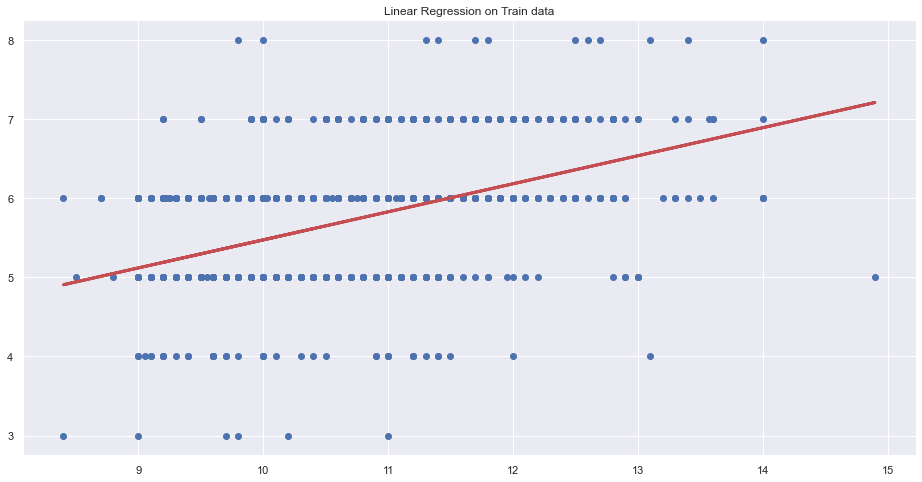

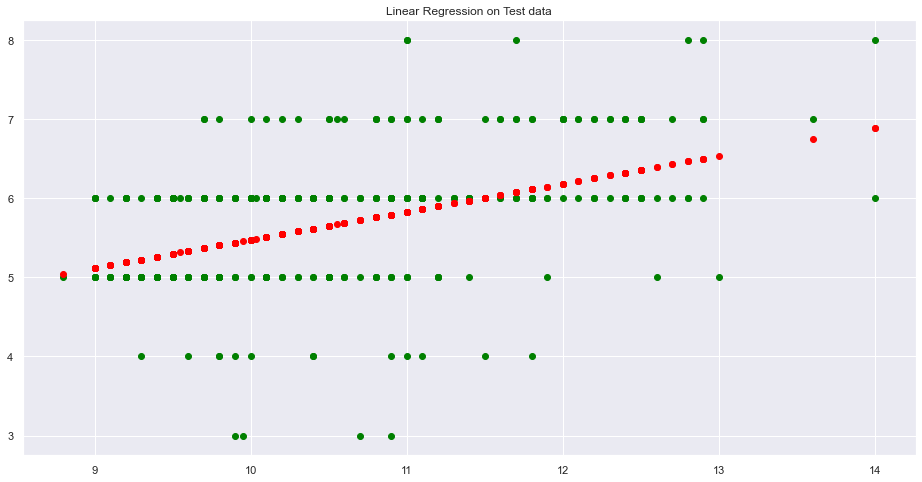

Explained Variance (R^2) 	: 0.23028077538248504
Mean Squared Error (MSE) 	: 0.5247127846766061
Root Mean Squared Error (RMSE) 	: 0.7243706127919645


In [90]:
printAllRegression(pd.DataFrame(df['alcohol']) )

Intercept 	: b =  [5.38925587]
Coefficients 	: a =  [[0.939022]]


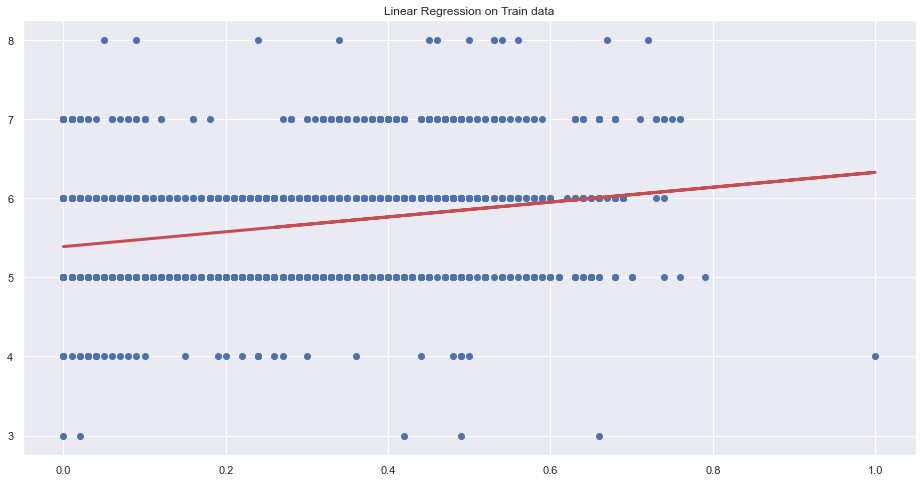

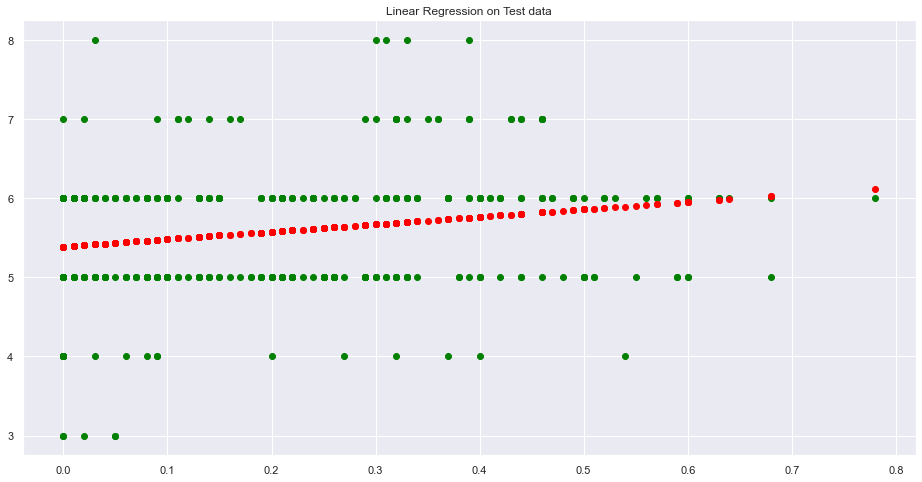

Explained Variance (R^2) 	: 0.03348218915396495
Mean Squared Error (MSE) 	: 0.6113225153601173
Root Mean Squared Error (RMSE) 	: 0.7818711628907394


In [79]:
printAllRegression(pd.DataFrame(df['citric acid']) )

Intercept 	: b =  [5.01710375]
Coefficients 	: a =  [[0.97278019]]


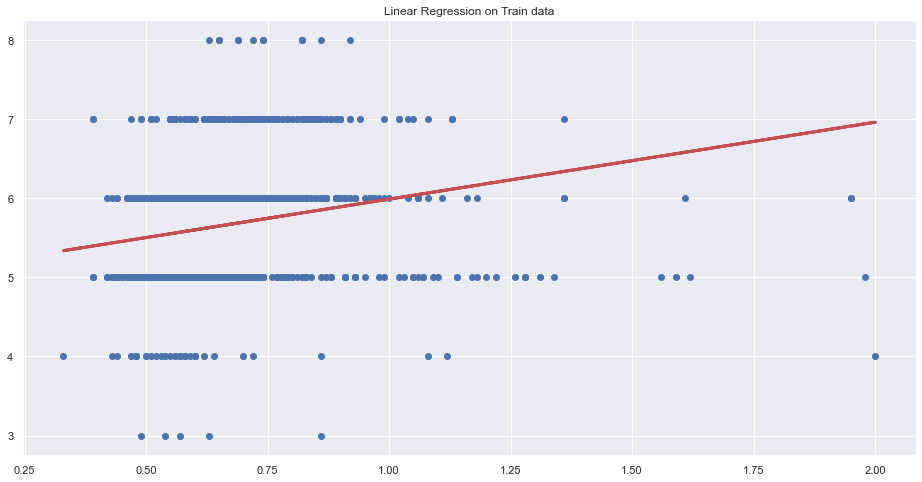

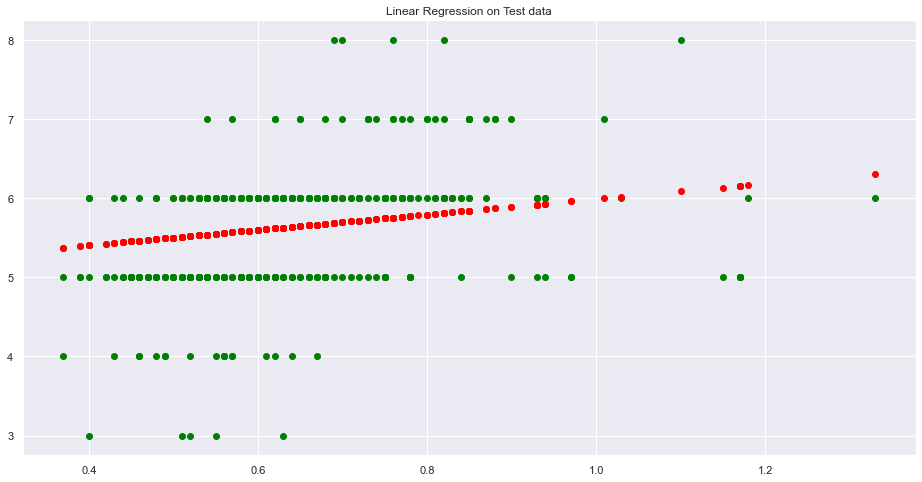

Explained Variance (R^2) 	: 0.09400554128146477
Mean Squared Error (MSE) 	: 0.5730414951394737
Root Mean Squared Error (RMSE) 	: 0.7569950430085217


In [80]:
printAllRegression(pd.DataFrame(df['sulphates']) )

Intercept 	: b =  [6.55564501]
Coefficients 	: a =  [[-1.71617885]]


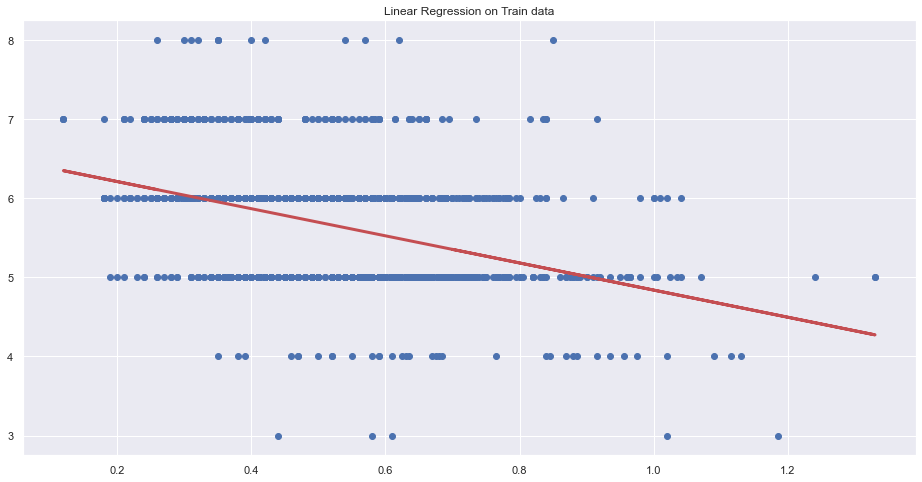

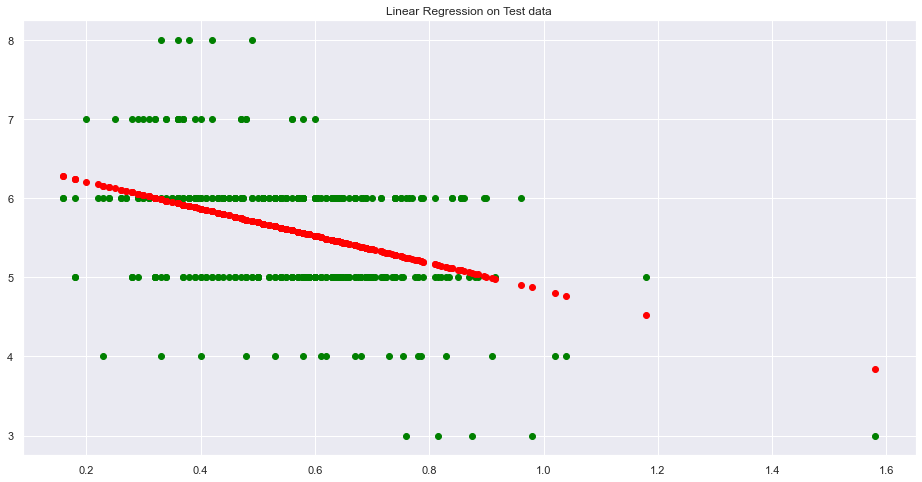

Explained Variance (R^2) 	: 0.16321599886837768
Mean Squared Error (MSE) 	: 0.5292658807157512
Root Mean Squared Error (RMSE) 	: 0.7275066190185153


In [81]:
printAllRegression(pd.DataFrame(df['volatile acidity']) )

Intercept 	: b =  [5.9183886]
Coefficients 	: a =  [[-0.00541054]]


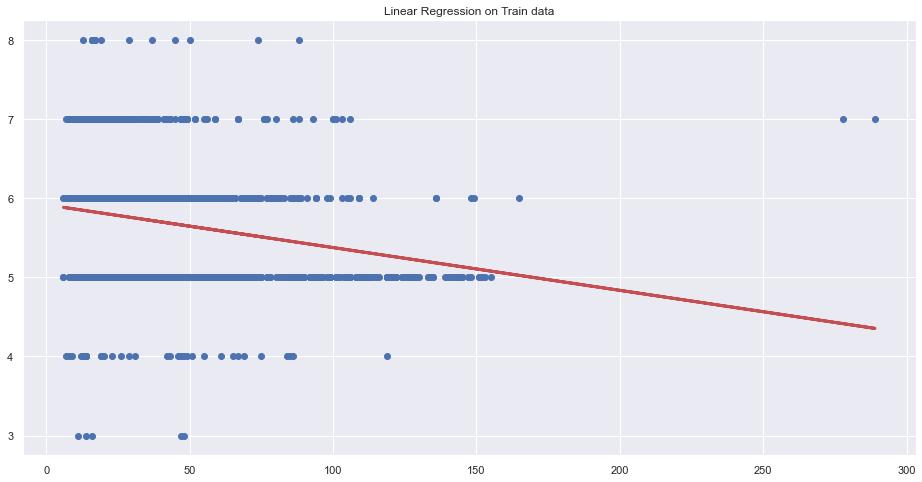

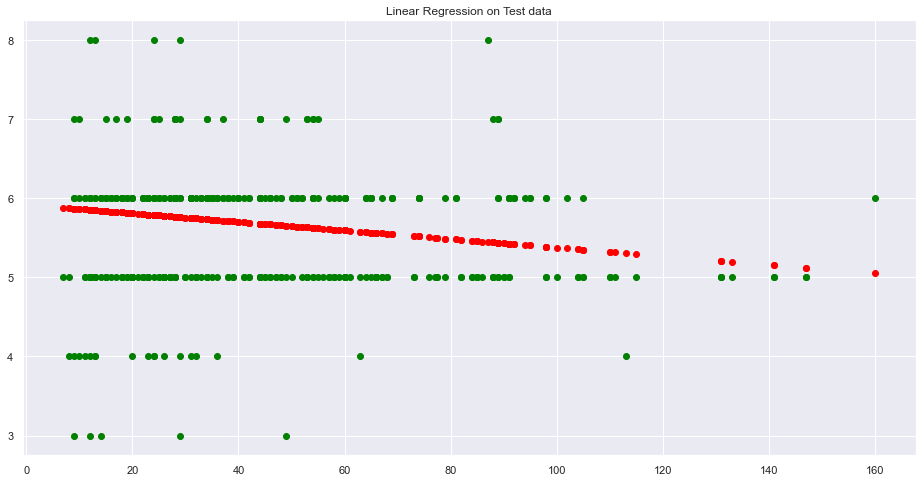

Explained Variance (R^2) 	: -0.04541628349361981
Mean Squared Error (MSE) 	: 0.6612257993097147
Root Mean Squared Error (RMSE) 	: 0.8131579178177598


In [82]:
printAllRegression(pd.DataFrame(df['total sulfur dioxide']))

Intercept 	: b =  [5.58423067]
Coefficients 	: a =  [[0.03138657]]


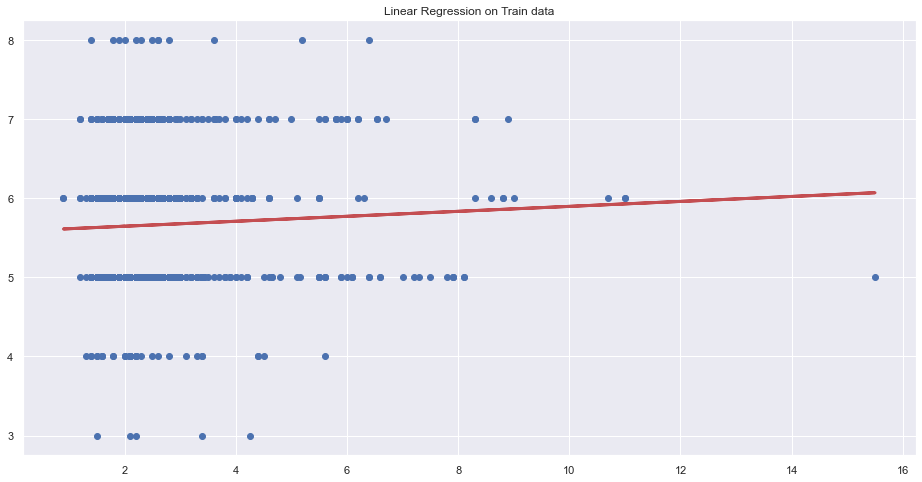

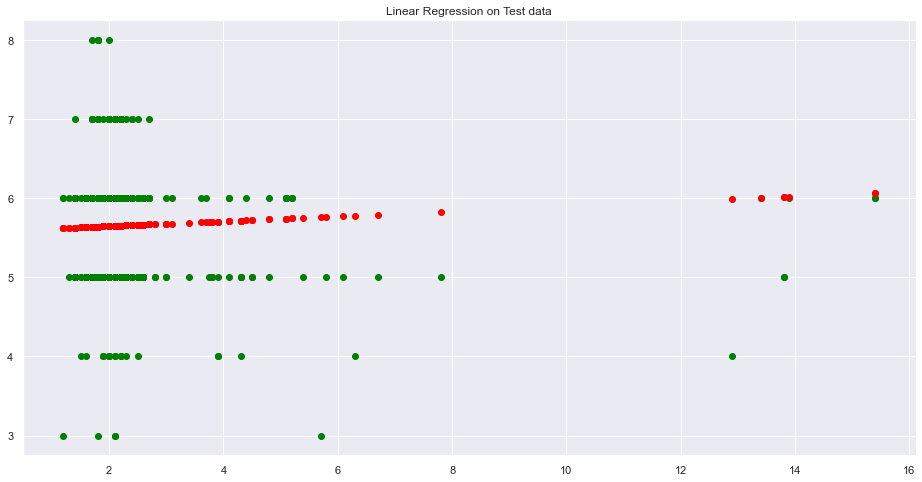

Explained Variance (R^2) 	: -0.0341474735375511
Mean Squared Error (MSE) 	: 0.6540982770125012
Root Mean Squared Error (RMSE) 	: 0.8087634246258304


In [85]:
printAllRegression(pd.DataFrame(df['residual sugar']) )

Intercept of Regression 	: b =  [1.47079246]
Coefficients of Regression 	: a =  [[0.46938733 0.75241109 0.33795459]]

    Predictors  Coefficients
0  citric acid      0.469387
1    sulphates      0.752411
2      alcohol      0.337955



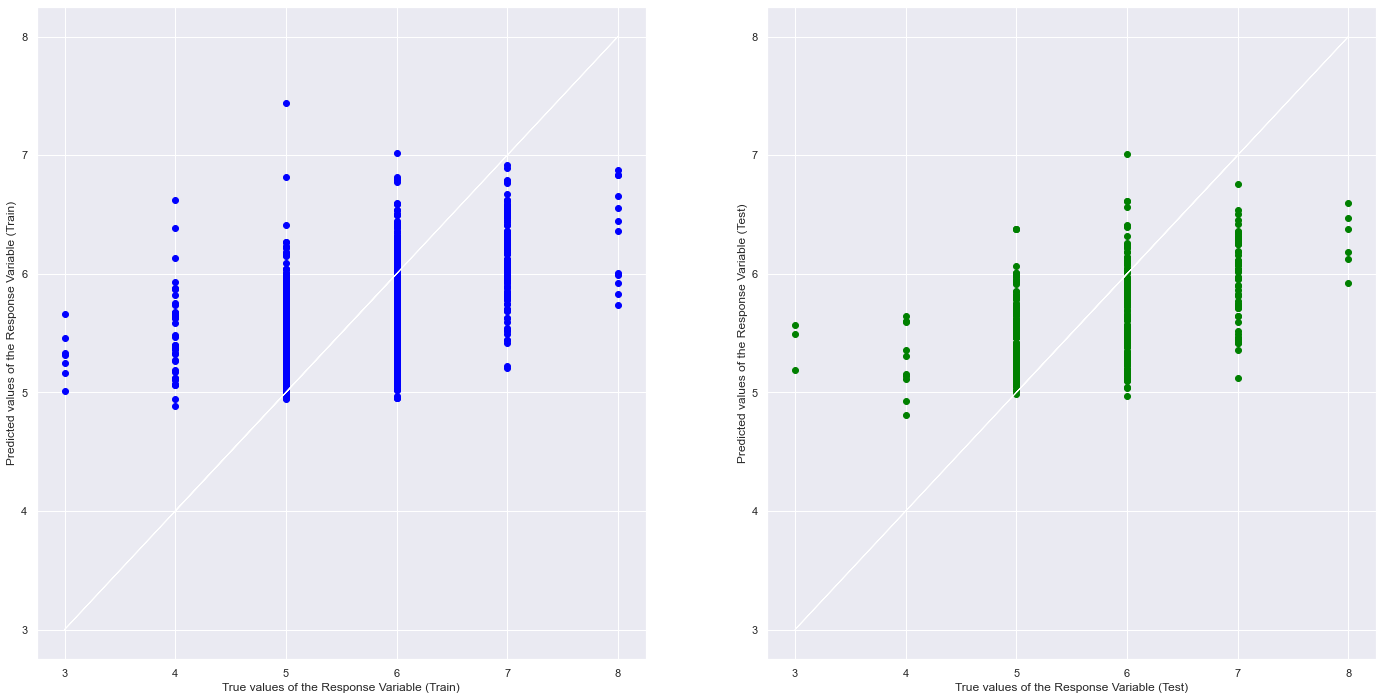

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.28887492934873016
Mean Squared Error (MSE) 	: 0.451096156498926

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.2623923725180839
Mean Squared Error (MSE) 	: 0.5168969851486398



In [86]:
# Extract Response and Predictors
y = pd.DataFrame(df['quality'])
X = pd.DataFrame(df[['citric acid', 'sulphates', 'alcohol']]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Intercept of Regression 	: b =  [75.47929424]
Coefficients of Regression 	: a =  [[-1.76769100e+00 -3.41822719e-03 -6.89634723e+01]]

             Predictors  Coefficients
0      volatile acidity     -1.767691
1  total sulfur dioxide     -0.003418
2               density    -68.963472



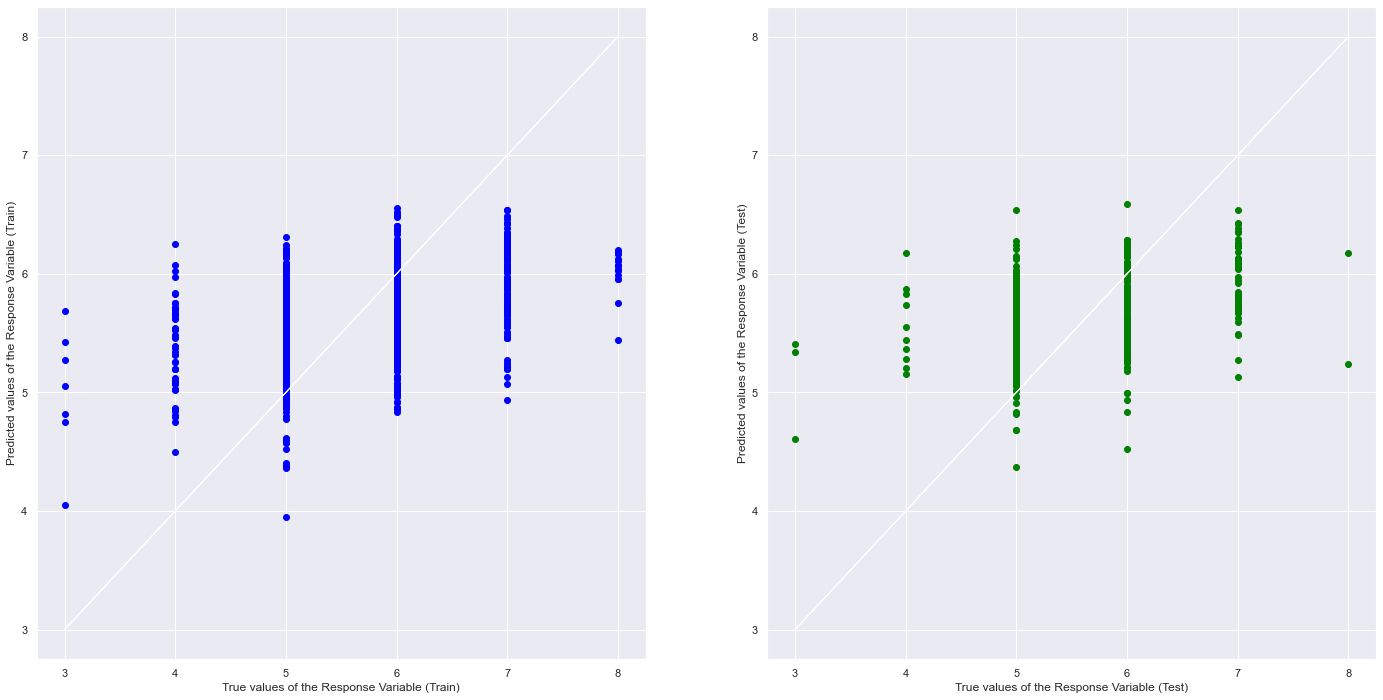

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.21527605225358015
Mean Squared Error (MSE) 	: 0.51852989631639

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.1499753870357633
Mean Squared Error (MSE) 	: 0.5286303068024588



In [87]:
# Extract Response and Predictors
y = pd.DataFrame(df['quality'])
X = pd.DataFrame(df[['volatile acidity', 'total sulfur dioxide', 'density']]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Intercept of Regression 	: b =  [29.35441137]
Coefficients of Regression 	: a =  [[ 3.25048811e-02 -9.79497589e-01 -1.35009508e-01  2.30654868e-02
  -1.53393298e+00  3.49793911e-03 -3.12402190e-03 -2.52463125e+01
  -4.90559487e-01  1.02956934e+00  2.71402682e-01]]

              Predictors  Coefficients
0          fixed acidity      0.032505
1       volatile acidity     -0.979498
2            citric acid     -0.135010
3         residual sugar      0.023065
4              chlorides     -1.533933
5    free sulfur dioxide      0.003498
6   total sulfur dioxide     -0.003124
7                density    -25.246312
8                     pH     -0.490559
9              sulphates      1.029569
10               alcohol      0.271403



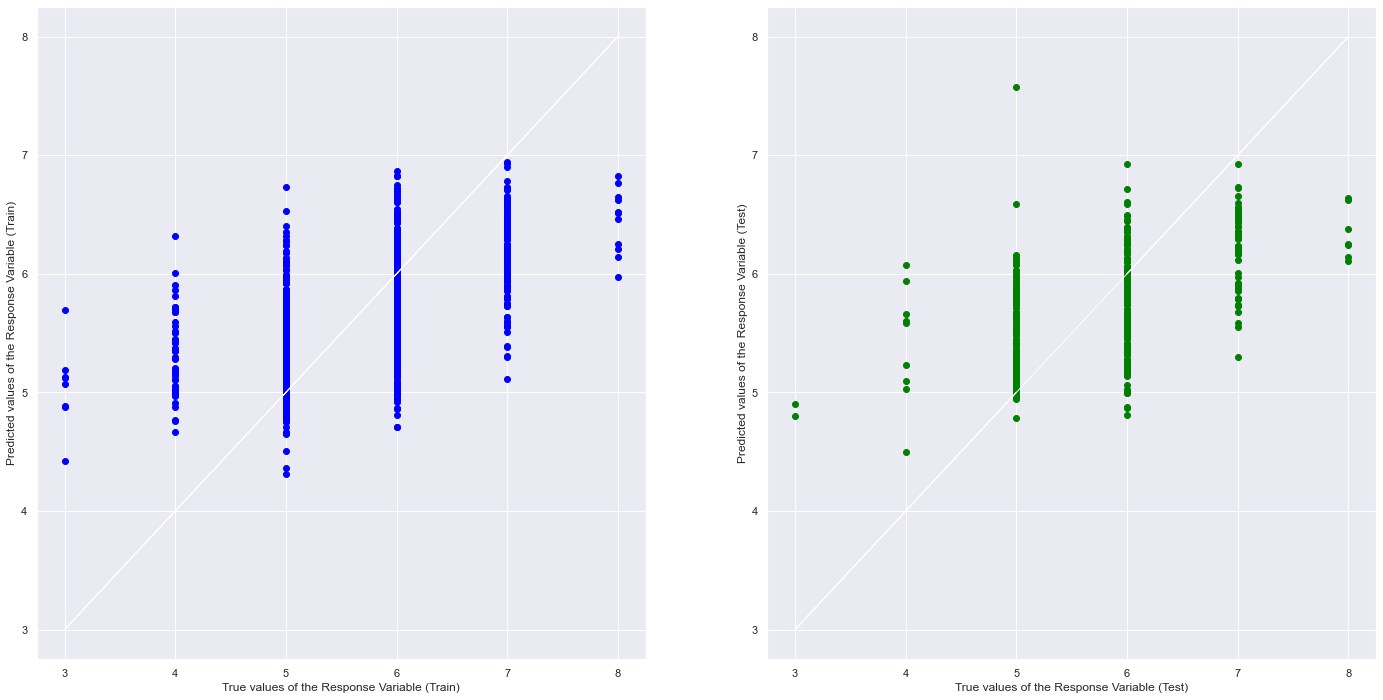

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3685797472689969
Mean Squared Error (MSE) 	: 0.40842004465043164

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.31651461934110214
Mean Squared Error (MSE) 	: 0.449524063075728



In [88]:
# Extract Response and Predictors
y = pd.DataFrame(df['quality'])
X = pd.DataFrame(df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Logistic Regression - Using one variable to determine wine quality
https://www.kaggle.com/abolarinbukola/logistic-regression-wine-quality-92

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [130]:
grade = [] #Declaring a new list
for i in df['quality']: 
    if i > 5.5:
        i = 1
        grade.append(i)
    else:
        i = 0
        grade.append(i)
df['grade'] = grade # A new column to hold our already categoried quality 

In [178]:
def printLogRegression(x,y = grade):
    scaler = StandardScaler()
    scaler.fit(x)
    scaled_x = scaler.transform(x)
    
    x_train, x_test, y_train, y_test = train_test_split(scaled_x, y , test_size = 0.2, random_state  = 365)
    
    reg.fit(x_train,y_train) # we fit the algorithm with the training data and the training output
    
    y_hat = reg.predict(x_test)
    acc = metrics.accuracy_score(y_hat,y_test)# To know the accuracy
    print('Accuracy',acc)
    print()
    
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()
    
    result = pd.DataFrame(data = x.columns, columns = ['Features'])
    result['weight'] = np.transpose(reg.coef_)
    result['odds'] = np.exp(np.transpose(reg.coef_))
    print(result)
    print()
    
    cm = confusion_matrix(y_hat,y_test)
    
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
    print(cm_df)

In [179]:
printLogRegression(pd.DataFrame(df['alcohol']) )

Accuracy 0.7

Intercept of Regression 	: b =  [29.35441137]
Coefficients of Regression 	: a =  [[ 3.25048811e-02 -9.79497589e-01 -1.35009508e-01  2.30654868e-02
  -1.53393298e+00  3.49793911e-03 -3.12402190e-03 -2.52463125e+01
  -4.90559487e-01  1.02956934e+00  2.71402682e-01]]

  Features   weight      odds
0  alcohol  1.12909  3.092841

          Predicted 0  Predicted 1
Actual 0          113           52
Actual 1           44          111


In [180]:
printLogRegression(pd.DataFrame(df['citric acid']))

Accuracy 0.575

Intercept of Regression 	: b =  [29.35441137]
Coefficients of Regression 	: a =  [[ 3.25048811e-02 -9.79497589e-01 -1.35009508e-01  2.30654868e-02
  -1.53393298e+00  3.49793911e-03 -3.12402190e-03 -2.52463125e+01
  -4.90559487e-01  1.02956934e+00  2.71402682e-01]]

      Features   weight      odds
0  citric acid  0.30814  1.360892

          Predicted 0  Predicted 1
Actual 0           76           55
Actual 1           81          108


In [181]:
printLogRegression(pd.DataFrame(df['sulphates']))

Accuracy 0.64375

Intercept of Regression 	: b =  [29.35441137]
Coefficients of Regression 	: a =  [[ 3.25048811e-02 -9.79497589e-01 -1.35009508e-01  2.30654868e-02
  -1.53393298e+00  3.49793911e-03 -3.12402190e-03 -2.52463125e+01
  -4.90559487e-01  1.02956934e+00  2.71402682e-01]]

    Features    weight      odds
0  sulphates  0.532682  1.703495

          Predicted 0  Predicted 1
Actual 0           86           43
Actual 1           71          120


In [182]:
printLogRegression(pd.DataFrame(df['volatile acidity']) )

Accuracy 0.659375

Intercept of Regression 	: b =  [29.35441137]
Coefficients of Regression 	: a =  [[ 3.25048811e-02 -9.79497589e-01 -1.35009508e-01  2.30654868e-02
  -1.53393298e+00  3.49793911e-03 -3.12402190e-03 -2.52463125e+01
  -4.90559487e-01  1.02956934e+00  2.71402682e-01]]

           Features    weight      odds
0  volatile acidity -0.700135  0.496518

          Predicted 0  Predicted 1
Actual 0           95           47
Actual 1           62          116


In [183]:
printLogRegression(pd.DataFrame(df['total sulfur dioxide']))

Accuracy 0.6125

Intercept of Regression 	: b =  [29.35441137]
Coefficients of Regression 	: a =  [[ 3.25048811e-02 -9.79497589e-01 -1.35009508e-01  2.30654868e-02
  -1.53393298e+00  3.49793911e-03 -3.12402190e-03 -2.52463125e+01
  -4.90559487e-01  1.02956934e+00  2.71402682e-01]]

               Features    weight      odds
0  total sulfur dioxide -0.465649  0.627728

          Predicted 0  Predicted 1
Actual 0           59           26
Actual 1           98          137


In [184]:
printLogRegression(pd.DataFrame(df['residual sugar']) )

Accuracy 0.503125

Intercept of Regression 	: b =  [29.35441137]
Coefficients of Regression 	: a =  [[ 3.25048811e-02 -9.79497589e-01 -1.35009508e-01  2.30654868e-02
  -1.53393298e+00  3.49793911e-03 -3.12402190e-03 -2.52463125e+01
  -4.90559487e-01  1.02956934e+00  2.71402682e-01]]

         Features    weight      odds
0  residual sugar -0.029461  0.970969

          Predicted 0  Predicted 1
Actual 0            0            2
Actual 1          157          161


In [185]:
printLogRegression(pd.DataFrame(df[['alcohol', 'citric acid', 'sulphates']]) )

Accuracy 0.7125

Intercept of Regression 	: b =  [29.35441137]
Coefficients of Regression 	: a =  [[ 3.25048811e-02 -9.79497589e-01 -1.35009508e-01  2.30654868e-02
  -1.53393298e+00  3.49793911e-03 -3.12402190e-03 -2.52463125e+01
  -4.90559487e-01  1.02956934e+00  2.71402682e-01]]

      Features    weight      odds
0      alcohol  1.095620  2.991036
1  citric acid  0.141615  1.152133
2    sulphates  0.383607  1.467569

          Predicted 0  Predicted 1
Actual 0          113           48
Actual 1           44          115


In [186]:
printLogRegression(pd.DataFrame(df[['volatile acidity', 'total sulfur dioxide', 'density']]) )

Accuracy 0.7

Intercept of Regression 	: b =  [29.35441137]
Coefficients of Regression 	: a =  [[ 3.25048811e-02 -9.79497589e-01 -1.35009508e-01  2.30654868e-02
  -1.53393298e+00  3.49793911e-03 -3.12402190e-03 -2.52463125e+01
  -4.90559487e-01  1.02956934e+00  2.71402682e-01]]

               Features    weight      odds
0      volatile acidity -0.702975  0.495110
1  total sulfur dioxide -0.434972  0.647283
2               density -0.362561  0.695892

          Predicted 0  Predicted 1
Actual 0           95           34
Actual 1           62          129


In [187]:
printLogRegression(pd.DataFrame(df[['residual sugar', 'free sulfur dioxide', 'pH']]) )

Accuracy 0.528125

Intercept of Regression 	: b =  [29.35441137]
Coefficients of Regression 	: a =  [[ 3.25048811e-02 -9.79497589e-01 -1.35009508e-01  2.30654868e-02
  -1.53393298e+00  3.49793911e-03 -3.12402190e-03 -2.52463125e+01
  -4.90559487e-01  1.02956934e+00  2.71402682e-01]]

              Features    weight      odds
0       residual sugar -0.007262  0.992764
1  free sulfur dioxide -0.106535  0.898944
2                   pH  0.037829  1.038554

          Predicted 0  Predicted 1
Actual 0           15            9
Actual 1          142          154


In [189]:
# All variables compared to quality
x = df.drop(['grade', 'quality'], axis =1 )
y = df['grade']

scaler = StandardScaler()
scaler.fit(x)
scaled_x = scaler.transform(x)

x_train, x_test, y_train, y_test = train_test_split(scaled_x, y , test_size = 0.2, random_state  = 365)

reg = LogisticRegression() #select the algorithm
reg.fit(x_train,y_train) # we fit the algorithm with the training data and the training output

y_hat = reg.predict(x_test) # y_hat holding the prediction made with the algorithm using x_test

acc = metrics.accuracy_score(y_hat,y_test)# To know the accuracy
print('Accuracy: ' , acc)
print()

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

result = pd.DataFrame(data = x.columns, columns = ['Features'])
result['weight'] = np.transpose(reg.coef_)
result['odds'] = np.exp(np.transpose(reg.coef_))
print(result)
print()

cm = confusion_matrix(y_hat,y_test)

# Format for easier understanding
cm_df = pd.DataFrame(cm)
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
print(cm_df)

Accuracy:  0.759375

Intercept of Regression 	: b =  [29.35441137]
Coefficients of Regression 	: a =  [[ 3.25048811e-02 -9.79497589e-01 -1.35009508e-01  2.30654868e-02
  -1.53393298e+00  3.49793911e-03 -3.12402190e-03 -2.52463125e+01
  -4.90559487e-01  1.02956934e+00  2.71402682e-01]]

                Features    weight      odds
0          fixed acidity  0.228456  1.256658
1       volatile acidity -0.555184  0.573967
2            citric acid -0.227309  0.796675
3         residual sugar  0.047617  1.048768
4              chlorides -0.178091  0.836866
5    free sulfur dioxide  0.235359  1.265363
6   total sulfur dioxide -0.491930  0.611445
7                density -0.130978  0.877237
8                     pH -0.062986  0.938957
9              sulphates  0.442252  1.556207
10               alcohol  0.914452  2.495407

          Predicted 0  Predicted 1
Actual 0          119           39
Actual 1           38          124
